In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import matplotlib as mpl

%matplotlib inline

plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("buildingdata_3.csv", index_col=0)

In [3]:
df

,Date,Total electricity consumption,Time,Air Temperature,Radiant Temperature,Operative Temperature,Outside Dry-Bulb Temperature,Glazing,Walls,Ceilings (int),...,General Lighting,Computer + Equip,Occupancy,Solar Gains Interior Windows,Solar Gains Exterior Windows,Zone Sensible Heating,Zone Sensible Cooling,Sensible Cooling,Total Cooling,Mech Vent + Nat Vent + Infiltration
Id,,,,,,,,,,,,,,,,,,,,,
1,1,0.54,1,25.80,27.12,26.46,18.92,-2.40,1.68,2.30,...,0.00,0.54,0.00,0.00,0.00,0,0.00,0.00,0.00,0.72
2,1,0.54,2,25.53,26.89,26.21,18.39,-2.62,1.89,2.30,...,0.00,0.54,0.00,0.00,0.00,0,0.00,0.00,0.00,0.72
3,1,0.54,3,25.32,26.69,26.00,18.14,-2.44,1.98,2.18,...,0.00,0.54,0.00,0.00,0.00,0,0.00,0.00,0.00,0.72
4,1,0.54,4,25.08,26.49,25.78,17.48,-2.50,2.05,2.09,...,0.00,0.54,0.00,0.00,0.00,0,0.00,0.00,0.00,0.72
5,1,0.54,5,24.72,26.24,25.48,16.41,-2.97,2.24,2.17,...,0.00,0.54,0.00,0.00,0.00,0,0.00,0.00,0.00,0.72
6,1,0.54,6,23.95,25.95,24.95,16.06,-2.97,2.71,2.45,...,0.00,0.54,0.00,0.00,0.00,0,-2.18,0.00,0.00,1.00
7,1,0.54,7,24.00,25.70,24.85,16.85,-2.92,2.59,2.21,...,0.00,0.54,0.00,0.00,0.00,0,-1.44,0.00,0.00,0.92
8,1,20.74,8,24.00,25.81,24.90,18.49,-1.97,0.97,-0.11,...,10.21,10.01,1.62,0.02,2.36,0,-16.20,0.00,0.00,3.77
9,1,21.26,9,24.00,26.39,25.20,21.08,0.88,-0.58,-2.45,...,10.21,10.01,3.23,0.12,13.87,0,-21.18,0.00,0.00,9.33


In [50]:
df.isnull().sum()

Date                                   0
Total electricity consumption          0
Time                                   0
Air Temperature                        0
Radiant Temperature                    0
Operative Temperature                  0
Outside Dry-Bulb Temperature           0
Glazing                                0
Walls                                  0
Ceilings (int)                         0
Floors (int)                           0
Ground Floors                          0
Partitions (int)                       0
Roofs                                  0
External Infiltration                  0
External Vent.                         0
General Lighting                       0
Computer + Equip                       0
Occupancy                              0
Solar Gains Interior Windows           0
Solar Gains Exterior Windows           0
Zone Sensible Heating                  0
Zone Sensible Cooling                  0
Sensible Cooling                       0
Total Cooling   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 1 to 1023
Data columns (total 26 columns):
Date                                   1023 non-null int64
Total electricity consumption          1023 non-null float64
Time                                   1023 non-null int64
Air Temperature                        1023 non-null float64
Radiant Temperature                    1023 non-null float64
Operative Temperature                  1023 non-null float64
Outside Dry-Bulb Temperature           1023 non-null float64
Glazing                                1023 non-null float64
Walls                                  1023 non-null float64
Ceilings (int)                         1023 non-null float64
Floors (int)                           1023 non-null float64
Ground Floors                          1023 non-null float64
Partitions (int)                       1023 non-null float64
Roofs                                  1023 non-null float64
External Infiltration                  1023

In [5]:
descr = df.describe()
descr

,Date,Total electricity consumption,Time,Air Temperature,Radiant Temperature,Operative Temperature,Outside Dry-Bulb Temperature,Glazing,Walls,Ceilings (int),...,General Lighting,Computer + Equip,Occupancy,Solar Gains Interior Windows,Solar Gains Exterior Windows,Zone Sensible Heating,Zone Sensible Cooling,Sensible Cooling,Total Cooling,Mech Vent + Nat Vent + Infiltration
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.00000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,...,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.0,1023.000000,1023.000000,1023.000000,1023.000000
mean,21.856305,14.314917,12.426197,26.341564,28.85828,27.599951,23.920440,1.059394,-0.086276,0.448944,...,3.672805,4.224321,1.745836,0.095054,8.330753,0.0,-16.272102,-19.607830,-26.341711,2.931632
std,12.312702,18.675758,6.907140,2.526243,1.65899,1.892956,4.057601,3.895191,2.593889,2.817585,...,4.902381,4.619216,2.584452,0.125157,10.534733,0.0,21.664448,30.606465,42.360232,3.233464
min,1.000000,0.540000,1.000000,23.920000,25.60000,24.760000,14.350000,-4.160000,-7.890000,-6.860000,...,0.000000,0.540000,0.000000,0.000000,0.000000,0.0,-65.080000,-105.480000,-182.370000,0.700000
25%,11.000000,0.540000,6.000000,24.000000,27.66500,26.450000,20.540000,-2.115000,-1.880000,-1.720000,...,0.000000,0.540000,0.000000,0.000000,0.000000,0.0,-39.780000,-45.120000,-57.210000,0.710000
50%,22.000000,0.540000,12.000000,26.070000,28.68000,26.960000,23.630000,-0.970000,0.640000,1.580000,...,0.000000,0.540000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.720000
75%,32.500000,34.350000,18.000000,27.880000,29.72500,28.245000,27.190000,4.780000,1.805000,2.300000,...,10.210000,10.010000,3.230000,0.210000,19.130000,0.0,0.000000,0.000000,0.000000,5.260000
max,43.000000,62.840000,24.000000,34.220000,34.49000,34.310000,34.160000,10.160000,6.300000,6.100000,...,10.210000,10.010000,6.470000,0.380000,32.660000,0.0,0.000000,0.000000,0.000000,16.390000


In [8]:
Xs = df.columns.tolist()
y = [Xs.pop(1)]

In [88]:
df2 = pd.DataFrame()

In [99]:
def ContinuousToLevel(data, col):
    m = data[col].min()
    M = data[col].max()
    space = np.linspace(m, M, 6)
    result = pd.cut(data[col], bins=space, labels=[str(space[i].round(2))+"~"+str(space[i+1].round(2)) for i in range(5)])
    return result

In [101]:
df2['Air Temperature'] = ContinuousToLevel(df, 'Air Temperature')
df2['Radiant Temperature'] = ContinuousToLevel(df, 'Radiant Temperature')
df2['Operative Temperature'] = ContinuousToLevel(df, 'Operative Temperature')
df2['Outside Dry-Bulb Temperature'] = ContinuousToLevel(df, 'Outside Dry-Bulb Temperature')
df2['Total electricity consumption'] = df['Total electricity consumption']
df2['Time'] = df['Time']

In [102]:
df2.dropna(inplace=True)

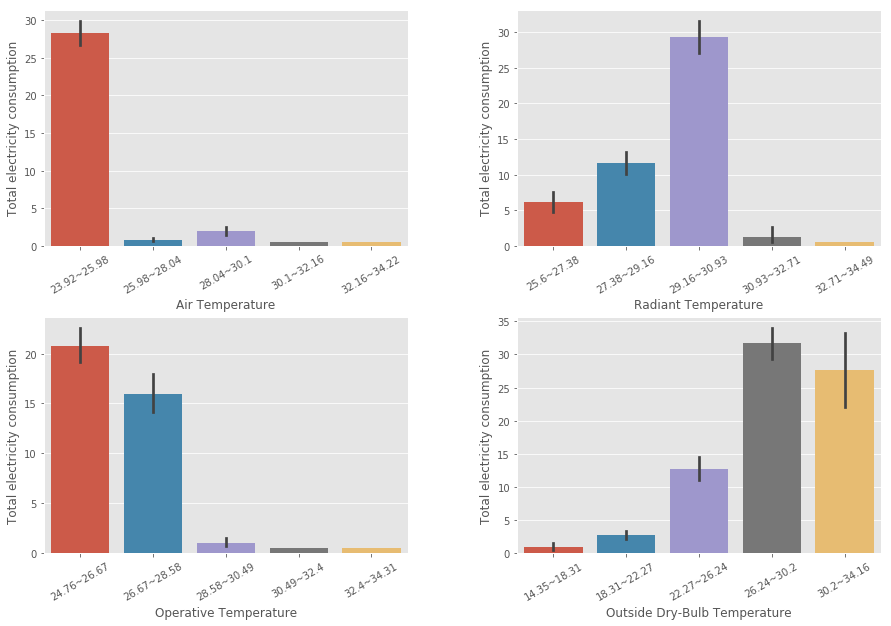

In [111]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

lst = ['Air Temperature',
 'Radiant Temperature',
 'Operative Temperature',
 'Outside Dry-Bulb Temperature',]
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data=df2, x=lst[i], y='Total electricity consumption')
    plt.xticks(rotation=30)
del lst

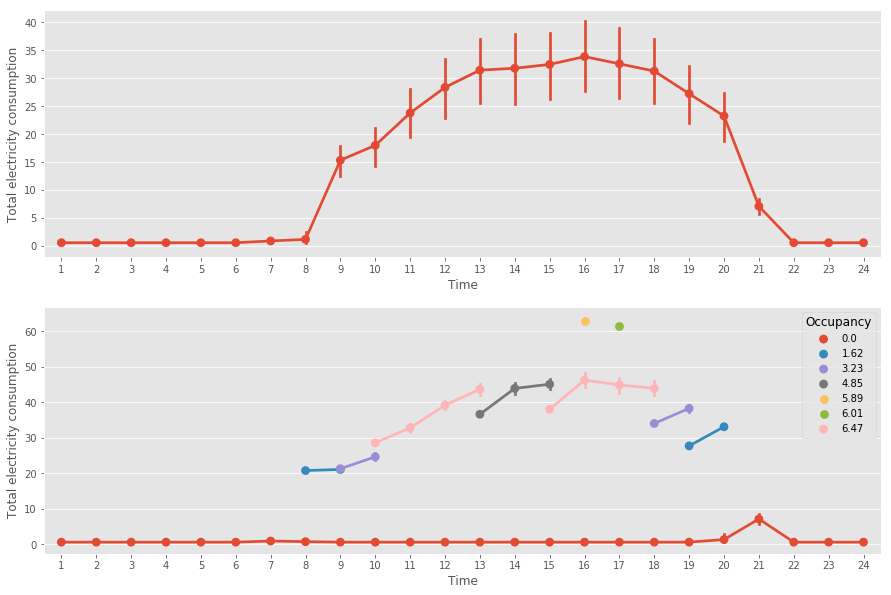

In [107]:
fig, ax = plt.subplots(2, figsize=(15, 10))

sns.pointplot(data=df, x="Time", y=y[0], ax=ax[0])
sns.pointplot(data=df, x="Time", y=y[0], hue='Occupancy', ax=ax[1])

# 설명변수, 종속변수 정의

In [165]:
y = df['Total electricity consumption']
x = df[Xs[2:]]

# feature 간의 상관관계

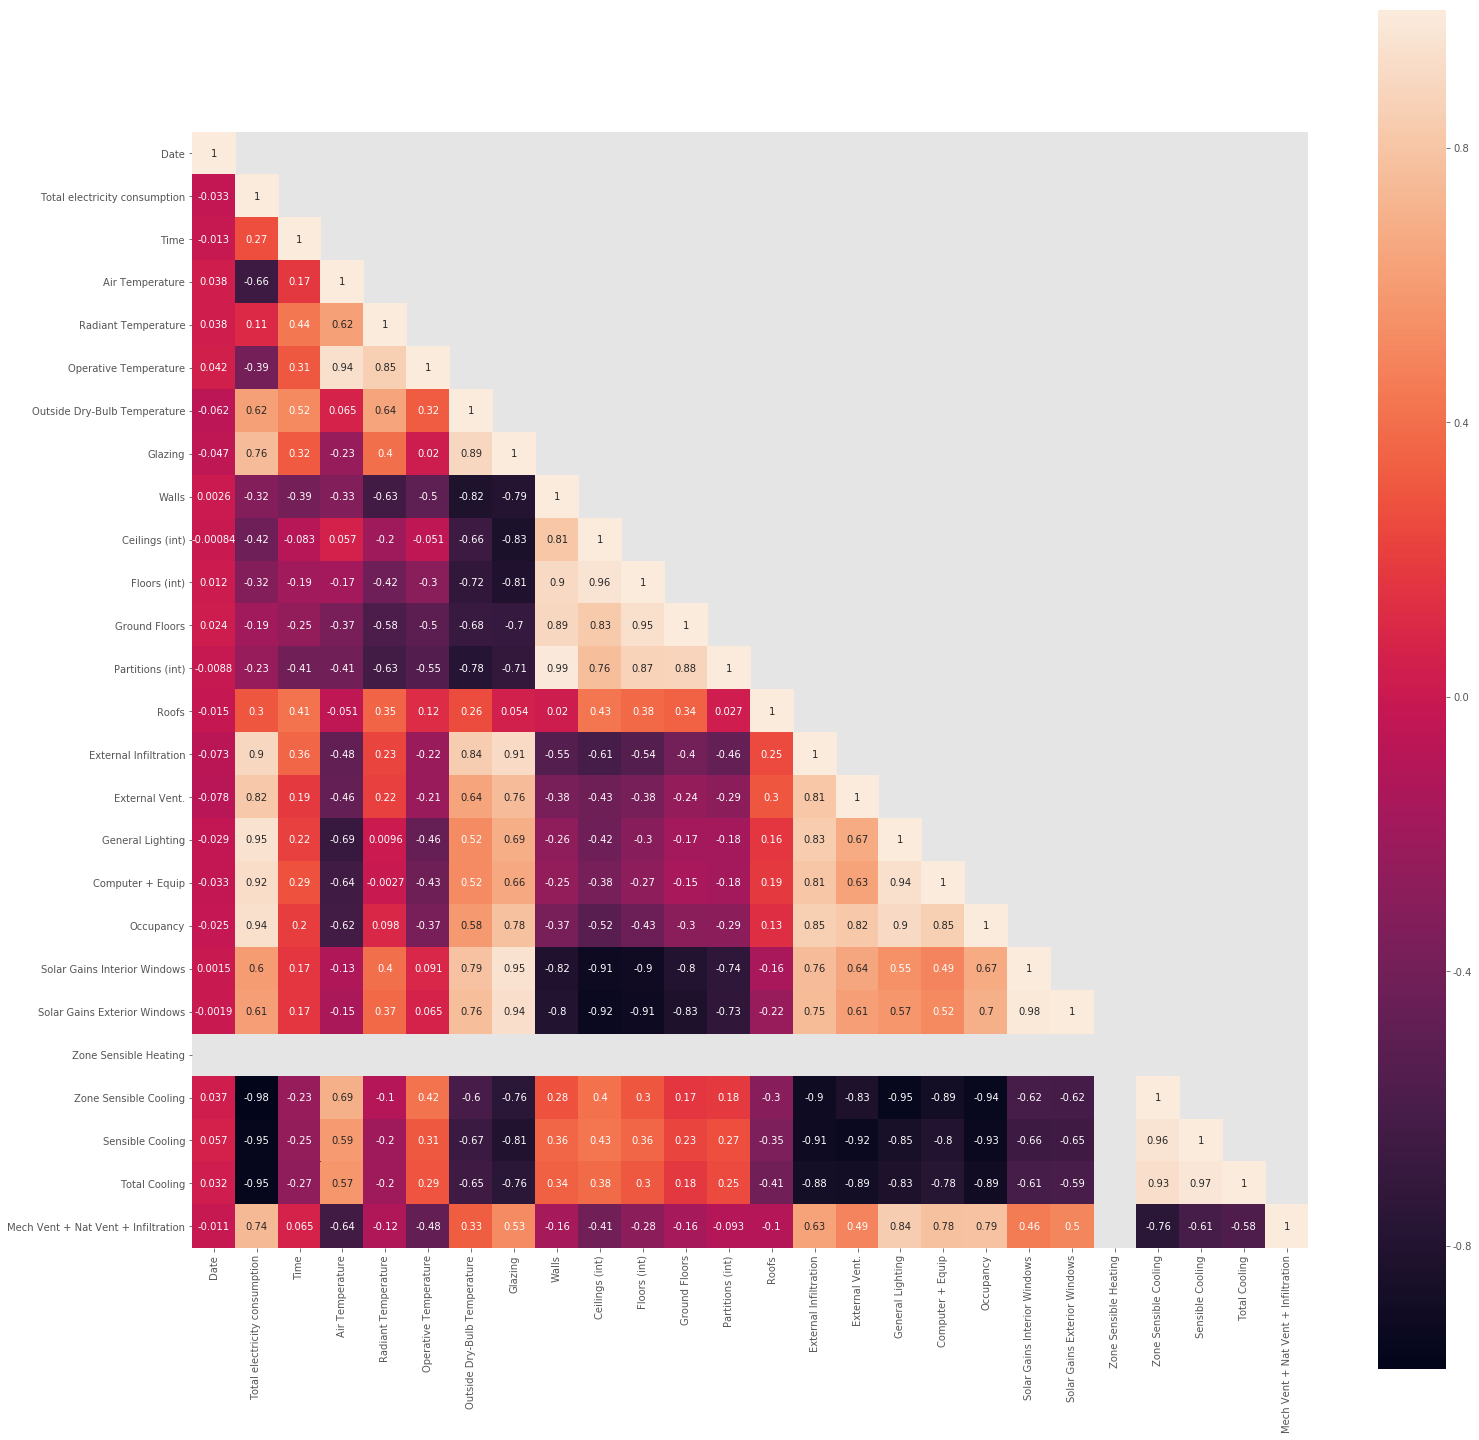

In [166]:
corrmat = df.corr()
mask = np.array(corrmat)
mask[np.tril_indices_from(mask)] = False
f, ax = plt.subplots(figsize = (25, 25))
sns.heatmap(corrmat, mask = mask, vmax = 1, square=True, annot=True)

# 다변량회귀분석(선형회귀)

In [296]:
def RegrEngine(y, x):
    x = sm.add_constant(x)
    results = sm.OLS(y, x).fit()
    return results


In [306]:
collst = df.columns.tolist()
collst 

['Date',
 'Total electricity consumption',
 'Time',
 'Air Temperature',
 'Radiant Temperature',
 'Operative Temperature',
 'Outside Dry-Bulb Temperature',
 'Glazing',
 'Walls',
 'Ceilings (int)',
 'Floors (int)',
 'Ground Floors',
 'Partitions (int)',
 'Roofs',
 'External Infiltration',
 'External Vent.',
 'General Lighting',
 'Computer + Equip',
 'Occupancy',
 'Solar Gains Interior Windows',
 'Solar Gains Exterior Windows',
 'Zone Sensible Heating',
 'Zone Sensible Cooling',
 'Sensible Cooling',
 'Total Cooling',
 'Mech Vent + Nat Vent + Infiltration']

In [311]:
tmp = df[df['Total electricity consumption'] > 0.54]
tmp_y = tmp['Total electricity consumption']
tmp_x = tmp[['Air Temperature',
 'Radiant Temperature',
 'Operative Temperature',
 'Outside Dry-Bulb Temperature',
 'Glazing',
 'Walls',
 'Ceilings (int)',
 'Floors (int)',
 'Roofs',
 'External Infiltration',
 'External Vent.',
 'Occupancy',
 'Solar Gains Interior Windows',
 'Solar Gains Exterior Windows',
 'Zone Sensible Heating',
 'Zone Sensible Cooling',
 'Sensible Cooling',
 'Total Cooling',
 'Mech Vent + Nat Vent + Infiltration']]

In [312]:
results = RegrEngine(tmp_y, tmp_x)
print(results.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Total electricity consumption   R-squared:                       0.997
Model:                                       OLS   Adj. R-squared:                  0.996
Method:                            Least Squares   F-statistic:                     6403.
Date:                           Tue, 06 Nov 2018   Prob (F-statistic):               0.00
Time:                                   19:45:57   Log-Likelihood:                -471.91
No. Observations:                            413   AIC:                             981.8
Df Residuals:                                394   BIC:                             1058.
Df Model:                                     18                                         
Covariance Type:                       nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.9

# 결과

In [297]:
results = RegrEngine(y, x)
print(results.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Total electricity consumption   R-squared:                       1.000
Model:                                       OLS   Adj. R-squared:                  1.000
Method:                            Least Squares   F-statistic:                 3.171e+08
Date:                           Tue, 06 Nov 2018   Prob (F-statistic):               0.00
Time:                                   19:39:35   Log-Likelihood:                 3614.6
No. Observations:                           1023   AIC:                            -7183.
Df Residuals:                               1000   BIC:                            -7070.
Df Model:                                     22                                         
Covariance Type:                       nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.9

In [300]:

results = RegrEngine(y, x[['Air Temperature',
 'Radiant Temperature',
 'Operative Temperature',
 'Outside Dry-Bulb Temperature',
 'Glazing',
 'Walls',
 'Ceilings (int)',
 'Floors (int)',
 'Roofs',
 'External Infiltration',
 'External Vent.',
 'Occupancy',
 'Solar Gains Interior Windows',
 'Solar Gains Exterior Windows',
 'Zone Sensible Heating',
 'Zone Sensible Cooling',
 'Sensible Cooling',
 'Total Cooling',
 'Mech Vent + Nat Vent + Infiltration']])
print(results.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Total electricity consumption   R-squared:                       0.994
Model:                                       OLS   Adj. R-squared:                  0.993
Method:                            Least Squares   F-statistic:                     8595.
Date:                           Tue, 06 Nov 2018   Prob (F-statistic):               0.00
Time:                                   19:41:14   Log-Likelihood:                -1865.6
No. Observations:                           1023   AIC:                             3769.
Df Residuals:                               1004   BIC:                             3863.
Df Model:                                     18                                         
Covariance Type:                       nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.9

# 회귀 계수

In [169]:
regrCoef = round(results.params, 5)
regrCoef

const                                 -0.02607
Air Temperature                        0.01588
Radiant Temperature                    0.03046
Operative Temperature                 -0.04709
Outside Dry-Bulb Temperature           0.00134
Glazing                                0.00178
Walls                                 -0.00405
Ceilings (int)                        -0.00425
Floors (int)                           0.00042
Ground Floors                         -0.00430
Partitions (int)                       0.02959
Roofs                                 -0.00064
External Infiltration                 -0.00298
External Vent.                         0.00301
General Lighting                       0.99848
Computer + Equip                       1.00029
Occupancy                              0.32335
Solar Gains Interior Windows          -0.06016
Solar Gains Exterior Windows          -0.00163
Zone Sensible Heating                  0.00000
Zone Sensible Cooling                  0.00003
Sensible Cool

# 계수가 높은 순으로
* Computer+Equip , General Lighting , Occupancy 3가지 feature가 가장 영향을 많이 미치는 것 같음
* Total Cooling 도 꽤 큰 영향

In [170]:
pd.DataFrame(regrCoef).sort_values(0, ascending=False)

,0
Computer + Equip,1.00029
General Lighting,0.99848
Occupancy,0.32335
Radiant Temperature,0.03046
Partitions (int),0.02959
Air Temperature,0.01588
External Vent.,0.00301
Glazing,0.00178
Outside Dry-Bulb Temperature,0.00134
Floors (int),0.00042


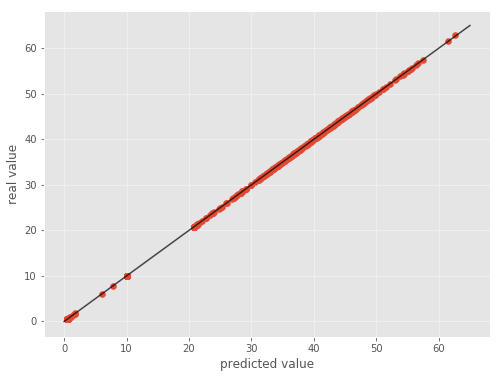

In [171]:
plt.figure(figsize=(8,6))
plt.plot([0,65], [0,65], c="black", alpha=0.7)
plt.scatter(np.dot(sm.add_constant(np.array(x)), regrCoef), y)
plt.ylabel("real value")
plt.xlabel("predicted value")
plt.grid(True, alpha=0.5)

In [177]:
from scipy import stats

In [191]:
y_stat = y.describe()
y_stat

count    1023.000000
mean       14.314917
std        18.675758
min         0.540000
25%         0.540000
50%         0.540000
75%        34.350000
max        62.840000
Name: Total electricity consumption, dtype: float64

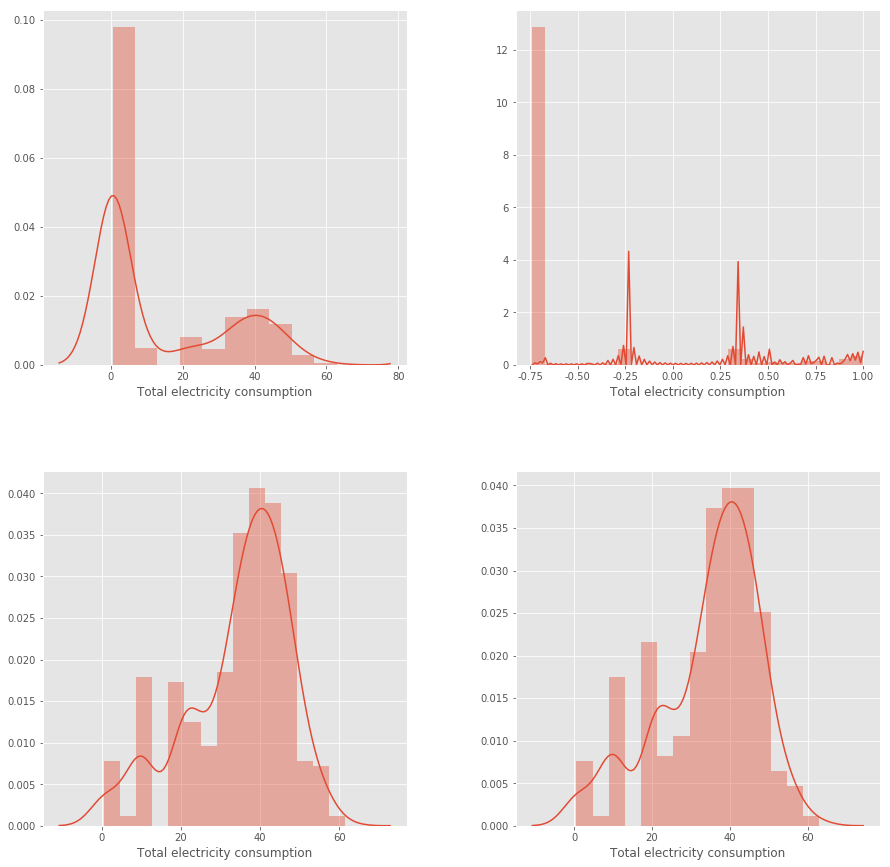

In [233]:
# 종속변수 분포 확인
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 2, 1)
sns.distplot(y)

tmp_y = (y - y.mean())/y.std()
#
plt.subplot(2, 2, 2)
sns.distplot(tmp_y[(-1 <= tmp_y) & (tmp_y <= 1)])
del tmp_y

#
plt.subplot(2, 2, 3)
sns.distplot(y[((y.min())<y) & (y<(y.max()))])

#
plt.subplot(2, 2, 4)
sns.distplot(y[((y.min())<y)])


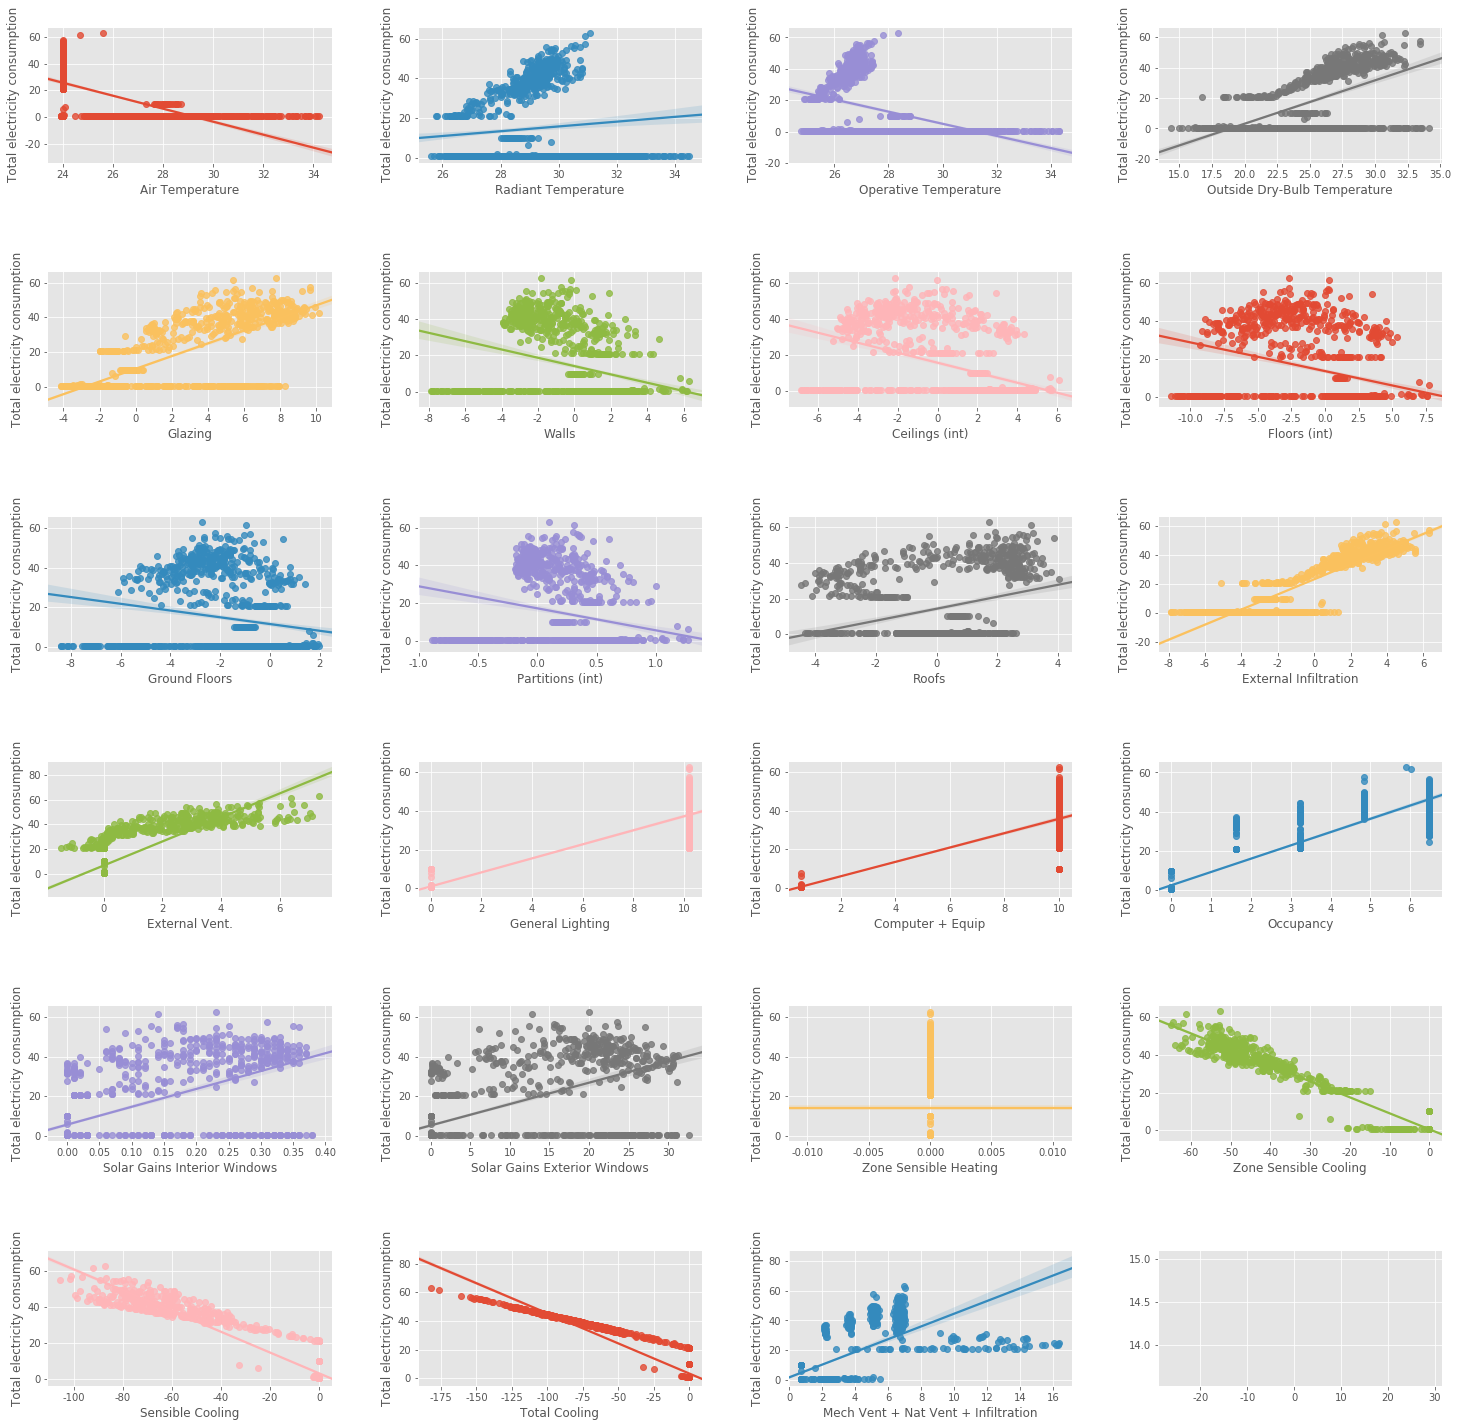

In [270]:
p = ['Total electricity consumption']
q = x.columns.tolist()
fig, ax = plt.subplots(6,4, figsize = (25,25))
plt.subplots_adjust(wspace=0.3, hspace=0.8)

sns.regplot(x=q[0], y=p[0], data=df, ax = ax[0,0])
sns.regplot(x=q[1], y=p[0], data=df, ax = ax[0,1])
sns.regplot(x=q[2], y=p[0], data=df, ax = ax[0,2])
sns.regplot(x=q[3], y=p[0], data=df, ax = ax[0,3])
sns.regplot(x=q[4], y=p[0], data=df, ax = ax[1,0])
sns.regplot(x=q[5], y=p[0], data=df, ax = ax[1,1])
sns.regplot(x=q[6], y=p[0], data=df, ax = ax[1,2])
sns.regplot(x=q[7], y=p[0], data=df, ax = ax[1,3])
sns.regplot(x=q[8], y=p[0], data=df, ax = ax[2,0])
sns.regplot(x=q[9], y=p[0], data=df, ax = ax[2,1])
sns.regplot(x=q[10], y=p[0], data=df, ax = ax[2,2])
sns.regplot(x=q[11], y=p[0], data=df, ax = ax[2,3])
sns.regplot(x=q[12], y=p[0], data=df, ax = ax[3,0])
sns.regplot(x=q[13], y=p[0], data=df, ax = ax[3,1])
sns.regplot(x=q[14], y=p[0], data=df, ax = ax[3,2])
sns.regplot(x=q[15], y=p[0], data=df, ax = ax[3,3])
sns.regplot(x=q[16], y=p[0], data=df, ax = ax[4,0])
sns.regplot(x=q[17], y=p[0], data=df, ax = ax[4,1])
sns.regplot(x=q[18], y=p[0], data=df, ax = ax[4,2])
sns.regplot(x=q[19], y=p[0], data=df, ax = ax[4,3])
sns.regplot(x=q[20], y=p[0], data=df, ax = ax[5,0])
sns.regplot(x=q[21], y=p[0], data=df, ax = ax[5,1])
sns.regplot(x=q[22], y=p[0], data=df, ax = ax[5,2])
# sns.regplot(x=q[23], y=p[0], data=df, ax = ax[5,3])

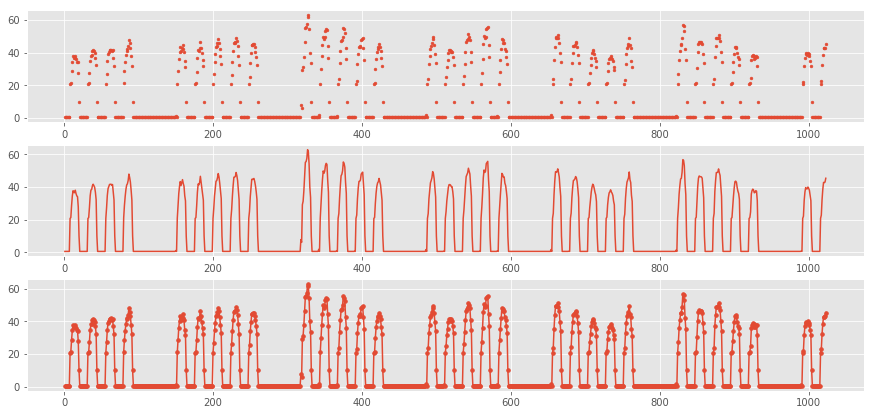

In [289]:
plt.figure(figsize=(15,7))
plt.subplot(3, 1, 1)
plt.scatter(y.index, y, s=8)
plt.subplot(3, 1, 2)
plt.plot(y.index, y)
plt.subplot(3, 1, 3)
plt.plot(y.index, y, '-o', markersize=3.5)